# Simple Analyse the Hologram Data output from Beam4


- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date March 7th 2017
- update March 15th 2017

with incident angle of 0.5 arcmin


In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [96]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Constants for conversions

In [97]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [98]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [99]:
deg_to_rad=np.pi/180.

In [100]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [101]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [102]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [103]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [104]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [105]:
theta_x=0.5  # angle in arcmin
theta_y=0.5  # angle in arcmin 

In [106]:
order="OP1"
order_str="+1"

In [107]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [108]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr


In [109]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [110]:
!ls

AnaHoloSimple.ipynb
Beam4_Rayfile_484_allwl_p05_p05.xlsx
Beam4_Rayfile_484_allwl_p05_p05_O0.xlsx
Beam4_Rayfile_484_allwl_p05_p05_OP1.RAY
Beam4_Rayfile_484_allwl_p05_p05_OP1.xlsx
Beam_Rayfile_484_allwl_p05_p05_O0.RAY
DISP_Beam4_Rayfile_484_allwl_p05_p05_O0.png
DISP_Beam4_Rayfile_484_allwl_p05_p05_OP1.png
DISP_PSF_Beam4_Rayfile_484_allwl_p05_p05_O0_out.xlsx
DISP_PSF_Beam4_Rayfile_484_allwl_p05_p05_OP1_out.xlsx
HOE_LSSCalyps_O0_07032017.OPT
HOE_LSSCalyps_OP1_07032017.OPT
PSF_Beam4_Rayfile_484_allwl_p05_p05_O0.png
PSF_Beam4_Rayfile_484_allwl_p05_p05_OP1.png


In [111]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}_{}.xlsx".format(NBTOT,theta_x_str,theta_y_str,order)

### Output file

In [112]:
outputdata_excel="DISP_PSF_Beam4_Rayfile_{:d}_allwl_{}_{}_{}_out.xlsx".format(NBTOT,theta_x_str,theta_y_str,order)

In [113]:
figname1="DISP_Beam4_Rayfile_{:d}_allwl_{}_{}_{}.png".format(NBTOT,theta_x_str,theta_y_str,order)
figname2="PSF_Beam4_Rayfile_{:d}_allwl_{}_{}_{}.png".format(NBTOT,theta_x_str,theta_y_str,order)

In [114]:
rayfile=Beam4_Rayfile

In [115]:
input = pd.ExcelFile(rayfile)

In [116]:
sheet_name=input.sheet_names[0]

In [117]:
df_colname = input.parse(sheet_name,index_row=0,header=2,usecols=range(0,14))

In [118]:
df_colname.head()

,---------------,---------------.1,---------------.2,---------------.3,---------------.4,---------------.5,----------,----------------,---------------.6,---------------.7,---------------.8,---------------.9,---------
0,-4.7296,-4.7296,0,0.025093,0.025093,0.999370,0.0004,-0.243286,NaN,NaN,-1.831147,-6.106554,OK 3
1,-4.14684,-4.7296,0,0.020047,0.025095,0.999484,0.0004,-0.231717,NaN,NaN,-1.831407,-6.107253,OK 3
2,-3.56409,-4.7296,0,0.015000,0.025098,0.999572,0.0004,-0.223097,NaN,NaN,-1.831669,-6.107952,OK 3
3,-2.98133,-4.7296,0,0.009952,0.025099,0.999635,0.0004,-0.217425,NaN,NaN,-1.831932,-6.108653,OK 3
4,-2.39857,-4.7296,0,0.004904,0.025100,0.999673,0.0004,-0.214704,NaN,NaN,-1.832195,-6.109353,OK 3


In [119]:
df = input.parse(sheet_name,index_row=0,header=2,usecols=range(0,14))
#df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]

In [120]:
df.head()

,X0,Y0,Z0,U0,V0,W0,wave,WFE,Xgoal,Ygoal,Xfinal,Yfinal,Notes
0,-4.7296,-4.7296,0,0.025093,0.025093,0.999370,0.0004,-0.243286,NaN,NaN,-1.831147,-6.106554,OK 3
1,-4.14684,-4.7296,0,0.020047,0.025095,0.999484,0.0004,-0.231717,NaN,NaN,-1.831407,-6.107253,OK 3
2,-3.56409,-4.7296,0,0.015000,0.025098,0.999572,0.0004,-0.223097,NaN,NaN,-1.831669,-6.107952,OK 3
3,-2.98133,-4.7296,0,0.009952,0.025099,0.999635,0.0004,-0.217425,NaN,NaN,-1.831932,-6.108653,OK 3
4,-2.39857,-4.7296,0,0.004904,0.025100,0.999673,0.0004,-0.214704,NaN,NaN,-1.832195,-6.109353,OK 3


### Decoding

In [121]:
wave=df["wave"]

In [122]:
Xfinal=df["Xfinal"]
Yfinal=df["Yfinal"]

In [123]:
selected_indexes1=np.where(wave==0.0004)
selected_indexes2=np.where(wave==0.0006)
selected_indexes3=np.where(wave==0.0008)
selected_indexes4=np.where(wave==0.0010)

In [124]:
selected_indexes1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]),)

In [125]:
def GetInfo(a):
    a_av=np.average(a)
    a_rms=np.std(a)
    a_min=np.min(a)
    a_max=np.max(a)
    a_width=a_max-a_min
    return a_av,a_rms,a_min,a_max,a_width

In [126]:
x1=Xfinal[selected_indexes1[0]]
y1=Yfinal[selected_indexes1[0]]

In [127]:
x1av,x1std,x1min,x1max,x1wdt=GetInfo(x1)
y1av,y1std,y1min,y1max,y1wdt=GetInfo(y1)

In [128]:
x2=Xfinal[selected_indexes2[0]]
y2=Yfinal[selected_indexes2[0]]

In [129]:
x2av,x2std,x2min,x2max,x2wdt=GetInfo(x2)
y2av,y2std,y2min,y2max,y2wdt=GetInfo(y2)

In [130]:
x3=Xfinal[selected_indexes3[0]]
y3=Yfinal[selected_indexes3[0]]

In [131]:
x3av,x3std,x3min,x3max,x3wdt=GetInfo(x3)
y3av,y3std,y3min,y3max,y3wdt=GetInfo(y3)

In [132]:
x4=Xfinal[selected_indexes4[0]]
y4=Yfinal[selected_indexes4[0]]

In [133]:
x4av,x4std,x4min,x4max,x4wdt=GetInfo(x4)
y4av,y4std,y4min,y4max,y4wdt=GetInfo(y4)

In [134]:
xav=np.array([x1av,x2av,x3av,x4av])
xstd=np.array([x1std,x2std,x3std,x4std])
xmin=np.array([x1min,x2min,x3min,x4min])
xmax=np.array([x1max,x2max,x3max,x4max])
xwdt=np.array([x1wdt,x2wdt,x3wdt,x4wdt])
yav=np.array([y1av,y2av,y3av,y4av])
ystd=np.array([y1std,y2std,y3std,y4std])
ymin=np.array([y1min,y2min,y3min,y4min])
ymax=np.array([y1max,y2max,y3max,y4max])
ywdt=np.array([y1wdt,y2wdt,y3wdt,y4wdt])


In [135]:
dataout = {'xav': xav,'xstd' :xstd,'xmin' :xmin,'xmax' :xmax,'xwdt':xwdt,'yav': yav,'ystd' :ystd,'ymin' :ymin,'ymax' :ymax,'ywdt':ywdt}

In [136]:
df = pd.DataFrame(dataout, index = ['400nm', '600nm', '800nm', '1000nm'])

In [137]:
df.head()

,xav,xmax,xmin,xstd,xwdt,yav,ymax,ymin,ystd,ywdt
400nm,-1.835958,-1.831147,-1.840767,0.002364,0.009620,-6.114305,-6.106554,-6.122061,0.003487,0.015507
600nm,-1.837679,-1.827300,-1.848096,0.004655,0.020796,-8.278141,-8.257112,-8.299228,0.010510,0.042116
800nm,-1.839438,-1.821365,-1.857648,0.008317,0.036283,-10.470093,-10.429215,-10.511145,0.021837,0.081930
1000nm,-1.841242,-1.813265,-1.869547,0.013419,0.056283,-12.700483,-12.632732,-12.768619,0.037617,0.135886


In [138]:
df.to_excel(outputdata_excel)

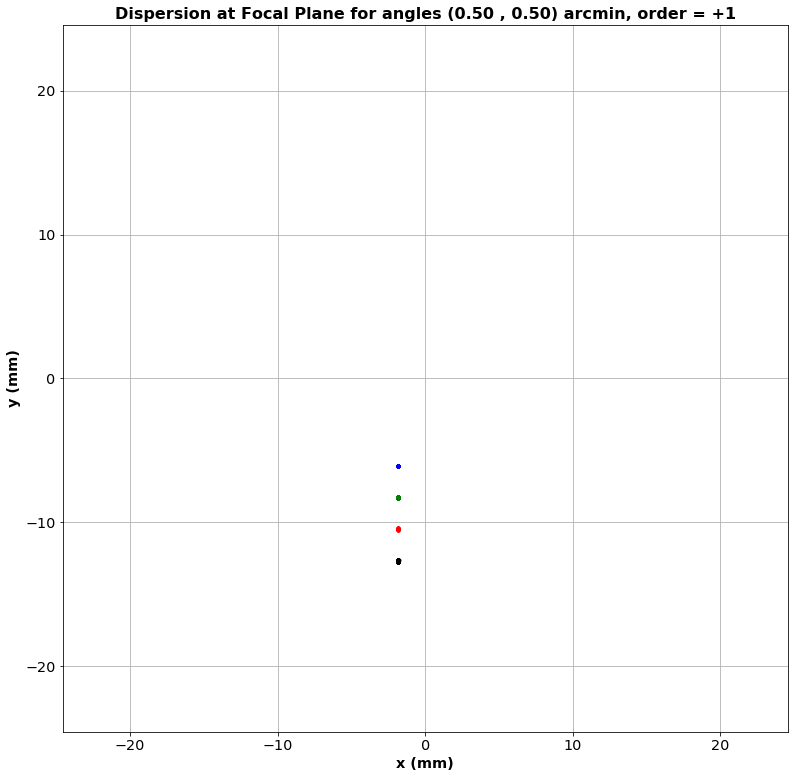

In [139]:
plt.plot(x1,y1,"b.")
plt.plot(x2,y2,"g.")
plt.plot(x3,y3,"r.")
plt.plot(x4,y4,"k.")
plt.xlim(-Det_size/2,Det_size/2.)
plt.ylim(-Det_size/2,Det_size/2)
plt.grid(True)
plt.xlabel("x (mm)",fontweight='bold')
plt.ylabel("y (mm)",fontweight='bold')
fulltitle="Dispersion at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.title(fulltitle,fontsize=16,fontweight='bold')
plt.savefig(figname1)

In [140]:
def Showscale(x,y,w,label,ax):
    xmin=x-w/2
    xmax=x+w/2
    ymin=y-w/2
    ymax=y+w/2
    xscale=xmax-xmin
    yscale=ymax-ymin
    ax.plot([xmin+xscale*.1,xmin+xscale*.1+w/10.],[ymin+yscale*0.8,ymin+yscale*0.8],'k-',lw=2)
    ax.text(xmin+xscale*.1, ymin+yscale*0.85, label,fontsize=16, fontweight='bold')

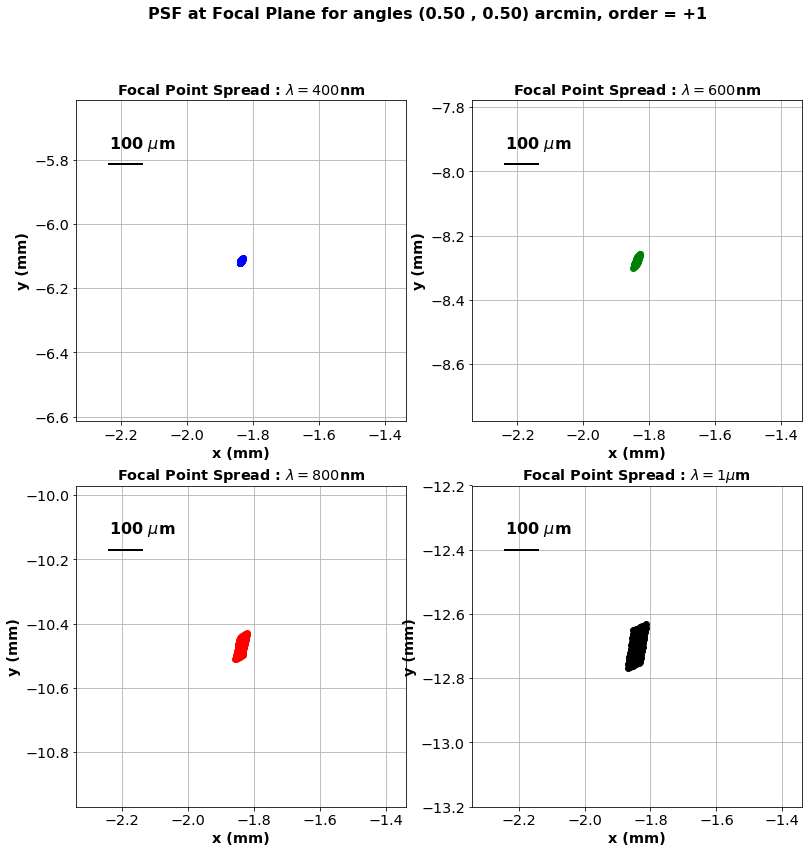

In [141]:
wdt=1.000  #1 mm
scalelabel="100 $\mu$m"

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#----------
ax1.plot(x1, y1,'bo')
Showscale(x1av,y1av,wdt,scalelabel,ax1)
ax1.set_xlim(x1av-wdt/2,x1av+wdt/2)
ax1.set_ylim(y1av-wdt/2,y1av+wdt/2)
ax1.set_title('Focal Point Spread : $\lambda=400$nm',fontweight='bold')
ax1.set_xlabel('x (mm)',fontweight='bold')
ax1.set_ylabel('y (mm)',fontweight='bold')
ax1.grid()
#--------------
ax2.plot(x2, y2,'go')
Showscale(x2av,y2av,wdt,scalelabel,ax2)
ax2.set_xlim(x2av-wdt/2,x2av+wdt/2)
ax2.set_ylim(y2av-wdt/2,y2av+wdt/2)
ax2.set_xlabel('x (mm)',fontweight='bold')
ax2.set_ylabel('y (mm)',fontweight='bold')
ax2.grid()
ax2.set_title('Focal Point Spread : $\lambda=600$nm',fontweight='bold')
#--------------------
ax3.plot(x3, y3,'ro')
Showscale(x3av,y3av,wdt,scalelabel,ax3)
ax3.set_xlim(x3av-wdt/2,x3av+wdt/2)
ax3.set_ylim(y3av-wdt/2,y3av+wdt/2)
ax3.set_xlabel('x (mm)',fontweight='bold')
ax3.set_ylabel('y (mm)',fontweight='bold')
ax3.grid()
ax3.set_title('Focal Point Spread : $\lambda=800$nm',fontweight='bold')
#-----------------------------
ax4.plot(x4, y4,'ko')
Showscale(x4av,y4av,wdt,scalelabel,ax4)
ax4.set_xlim(x4av-wdt/2,x4av+wdt/2)
ax4.set_ylim(y4av-wdt/2,y4av+wdt/2)
ax4.set_xlabel('x (mm)',fontweight='bold')
ax4.set_ylabel('y (mm)',fontweight='bold')
ax4.grid()
ax4.set_title('Focal Point Spread : $\lambda=1\mu$m',fontweight='bold')
#----------------------
fulltitle="PSF at Focal Plane for file = {}".format(rayfile)
fulltitle="PSF at Focal Plane for angles ({:2.2f} , {:2.2f}) arcmin, order = {}".format(theta_x,theta_y,order_str)
plt.suptitle(fulltitle,fontsize=16,fontweight='bold')
plt.savefig(figname2)